In [38]:
import pandahouse
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.stats.api as sms
from scipy.stats import chi2_contingency

In [3]:
df=pd.read_csv('/Users/Yanaorfin_1/Documents/Academy/AB_tests/E-commerce_AB_testing/ab_test.csv')
df_countries = pd.read_csv('/Users/Yanaorfin_1/Documents/Academy/AB_tests/E-commerce_AB_testing/countries_ab.csv')

In [4]:
df.isnull().sum()

id           0
time         0
con_treat    0
page         0
converted    0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [5]:
df.describe()

,id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [7]:
converted = df.groupby(['con_treat', 'converted']).size().unstack(fill_value=0)
percentages = converted.div(converted.sum(axis=1), axis=0) * 100


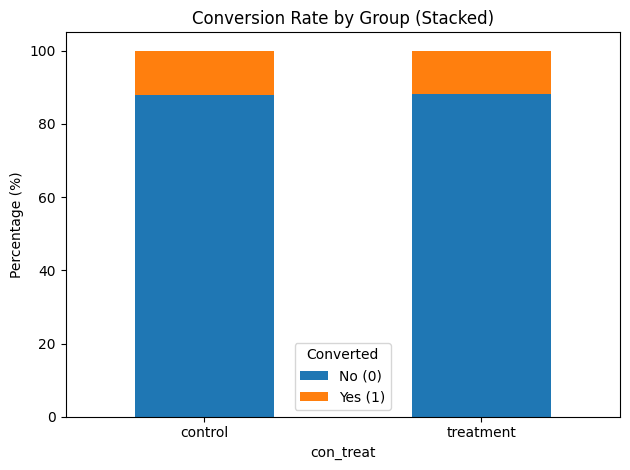

In [11]:
percentages.plot(kind='bar', stacked=True)

plt.ylabel("Percentage (%)")
plt.title("Conversion Rate by Group (Stacked)")
plt.legend(title="Converted", labels=["No (0)", "Yes (1)"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
percentages.head()

converted,0,1
con_treat,,
control,87.960082,12.039918
treatment,88.108042,11.891958


In [19]:
def sample_size_calculator(baseline_rate, minimum_effect, power=0.8, alpha=0.05):

    effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + minimum_effect)
    sample_size = sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha, ratio=1)
    return sample_size

baseline_rate = 0.12  # 12% conversion rate in a control group
minimum_effect = 0.005 # MDE

sample_size = sample_size_calculator(baseline_rate, minimum_effect)
print(f'required sample size to detect MDE: {sample_size:.0f}')


required sample size to detect MDE: 67490


In [29]:
crosstab = pd.crosstab(df['con_treat'], df['converted'])
crosstab.head()


converted,0,1
con_treat,,
control,129479,17723
treatment,129762,17514


In [36]:
# Calculate conversion rates
success_A = crosstab.loc['control', 1]
total_A = crosstab.loc['control'].sum()
p_A = success_A / total_A

success_B = crosstab.loc['treatment', 1]
total_B = crosstab.loc['treatment'].sum()
p_B = success_B / total_B

# Calculate lift
lift = p_B / p_A


In [39]:

# Standard error for lift (approximation using delta method)
se_A = np.sqrt(p_A * (1 - p_A) / total_A)
se_B = np.sqrt(p_B * (1 - p_B) / total_B)
se_lift = lift * np.sqrt((se_A / p_A) ** 2 + (se_B / p_B) ** 2)

# 95% confidence interval
ci_lower, ci_upper = norm.interval(0.95, loc=lift, scale=se_lift)

print("\nLift:", lift)
print("95% Confidence Interval for Lift:", (ci_lower, ci_upper))



Lift: 0.9877108814033853
95% Confidence Interval for Lift: (0.9683581372940006, 1.00706362551277)


In [25]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-squared value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared value: 1.5159618356336582
p-value: 0.2182316121631168
Degrees of freedom: 1
Expected frequencies:
 [[129587.92739016  17614.07260984]
 [129653.07260984  17622.92739016]]


Chi-square test  result is greater than 0.05, we fail to reject the null hypothesis (H0): There is no association between the groups and the conversion rate. The new page has no effect on the conversion rate

Therefore, the data suggests that the change to the new page did not have a significant impact on user conversion.